In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter # 범례 텍스트 수정을 위한 라이브러리
import os # 현재 작업 디렉토리 확인을 위한 라이브러리

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [2]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
meta_filepath = os.path.join(current_directory, 'legend', './hs_meta.csv')

# 데이터 불러오기
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드 출력
meta_data

,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,50.0,7.9,92000
1,죽음의 기사,혈기 죽음의 기사,49.4,2.5,29000
2,죽음의 기사,Highlander Blood Death Knight,47.3,0.8,9200
3,죽음의 기사,Rainbow Death Knight,39.9,0.6,7500
4,죽음의 기사,냉기 죽음의 기사,43.1,0.4,4300
...,...,...,...,...,...
57,전사,격노 전사,54.2,2.5,29000
58,전사,하이랜더 전사,46.7,0.6,6400
59,전사,Rock 'n' Roll Warrior,41.5,0.3,3300
60,전사,도발 전사,37.2,0.2,2500


In [3]:
# 직업별 총 점유율 계산
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index()

# 총 점유율이 큰 순서로 직업 정렬
hero_popular_total = hero_popular_total.sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 hero 열을 categorical 변수로 변환
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# '기타'가 포함된 경우 뒤에 직업 이름 추가하여 '덱' 수정
deck_total['Deck'] = deck_total.apply(lambda row: f"{row['Deck']} {row['Hero']}" if '기타' in row['Deck'] else row['Deck'], axis=1)

# 결과 확인
deck_total.head()

,Hero,Deck,Winrate,Popular,Games
50,흑마법사,Mining Warlock,46.0,2.1,24000
51,흑마법사,Sludge Warlock,36.5,0.6,6500
52,흑마법사,하이랜더 흑마법사,43.7,0.5,5700
55,흑마법사,기타 흑마법사,42.7,0.5,5600
53,흑마법사,저주 흑마법사,45.4,0.4,4600


In [4]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타 죽음의 기사': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '기타 악마사냥꾼': 'crimson',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '기타 드루이드': 'crimson',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    '기타 사냥꾼': 'crimson',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '기타 마법사': 'crimson',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '기타 성기사': 'crimson',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    '기타 사제': 'crimson',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '기타 도적': 'crimson',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    '기타 주술사': 'crimson',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '기타 흑마법사': 'crimson',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon',
    '기타 전사': 'crimson',
}

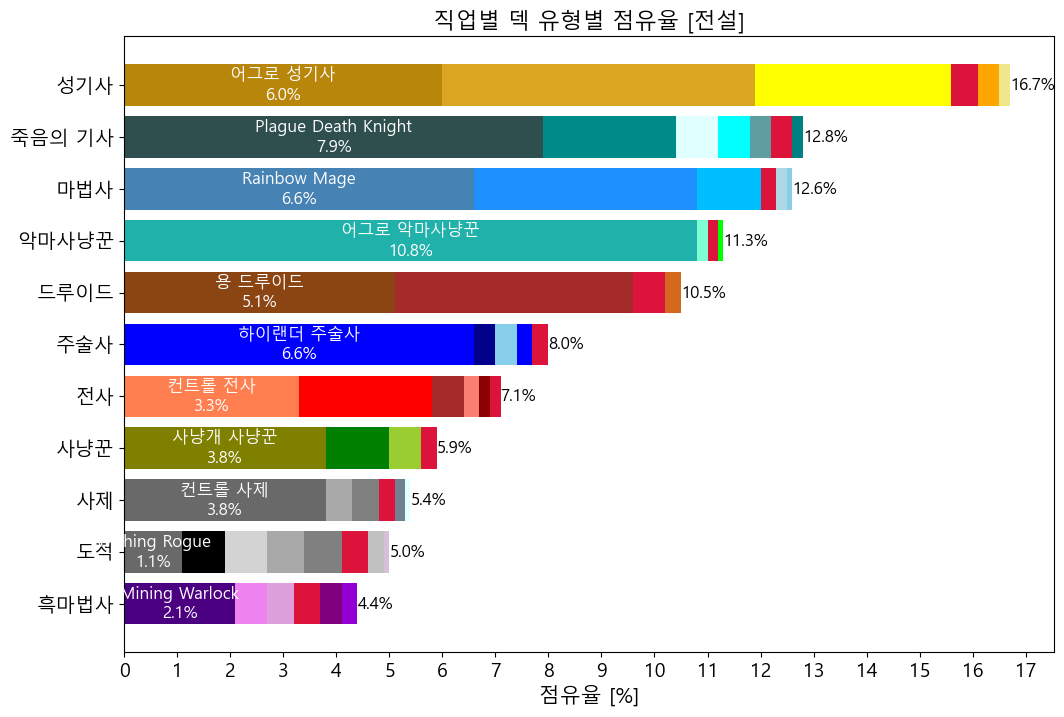

In [5]:
# 직업별로 덱 유형의 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# Seaborn을 사용하여 누적 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
for i, deck in enumerate(deck_total['Deck'].unique()):
    # 현재 덱에 대한 데이터 추출
    current_deck_data = deck_total[deck_total['Deck'] == deck]

    # 막대 그래프 그리기
    plt.barh(
        current_deck_data['Hero'],
        current_deck_data['Popular'],
        label=deck,
        color=deck_colors[deck],
        left=current_deck_data['Cumulative_Popular'] - current_deck_data['Popular']
    )

#직업별 가장 높은 점유율을 가진 덱 정보 가져오기
max_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Popular'].idxmax()])
total_popular_row = deck_total.groupby('Hero').apply(lambda x: x.loc[x['Cumulative_Popular'].idxmax()])

# 직업별로 가장 높은 점유율을 가진 덱 정보에 대한 범례 추가
for index, row in max_popular_row.iterrows():
    plt.text(row['Cumulative_Popular']/2, row['Hero'],
             f"{row['Deck']}\n{row['Popular']:.1f}%",
             color='white', ha='center', va='center', fontsize=12)

# 직업별로 총 점유율 정보에 대한 범례 추가
for index, row in total_popular_row.iterrows():
    plt.text(row['Cumulative_Popular'], row['Hero'],
             f"{row['Cumulative_Popular']:.1f}%",
             color='black', ha='left', va='center', fontsize=12)

# 축 설정
plt.title("직업별 덱 유형별 점유율 [전설]", fontsize=16)
plt.xticks(range(0, 18), fontsize=14)
plt.xlabel("점유율 [%]", fontsize =15)
plt.yticks(fontsize=14)

# 범례 끄기
plt.legend().set_visible(False)

plt.show()

In [6]:
# 현재 작업 디렉토리 확인
current_directory = os.getcwd()

# 파일의 상대 경로 지정
matchup_filepath = os.path.join(current_directory, 'legend', './hs_matchups.csv')

# 데이터 불러오기
matchup_data = pd.read_csv(matchup_filepath, index_col=0)

def convert_to_numeric(value):
    # '%' 제거 후 숫자로 변환, 에러가 발생하면 NaN 반환
    try:
        return float(value.rstrip('%'))
    except ValueError:
        return float('nan')

# '%'로 끝나는 열에 대해 함수 적용
matchup_data = matchup_data.applymap(convert_to_numeric)
matchup_data.head()

,어그로 악마사냥꾼,Plague Death Knight,Rainbow Mage,하이랜더 주술사,어그로 성기사,Showdown Paladin,용 드루이드,하이랜더 드루이드,Mining Mage,사냥개 사냥꾼,컨트롤 사제,하이랜더 성기사,컨트롤 전사,혈기 죽음의 기사
어그로 악마사냥꾼,NaN,56.01,57.17,48.44,53.74,42.95,43.72,59.88,56.71,47.37,51.88,52.78,47.86,54.60
Plague Death Knight,43.95,NaN,44.08,63.48,41.86,46.48,41.08,58.67,46.36,34.89,58.19,61.14,62.70,54.47
Rainbow Mage,42.82,55.91,NaN,52.17,51.27,50.71,47.45,46.68,57.23,41.95,63.17,58.26,54.88,51.68
하이랜더 주술사,51.55,36.49,47.82,NaN,47.24,53.52,54.19,60.89,49.28,49.27,56.69,60.98,50.70,54.42
어그로 성기사,46.25,58.13,48.72,52.75,NaN,40.90,69.87,69.95,50.33,65.13,56.10,53.56,56.39,53.76


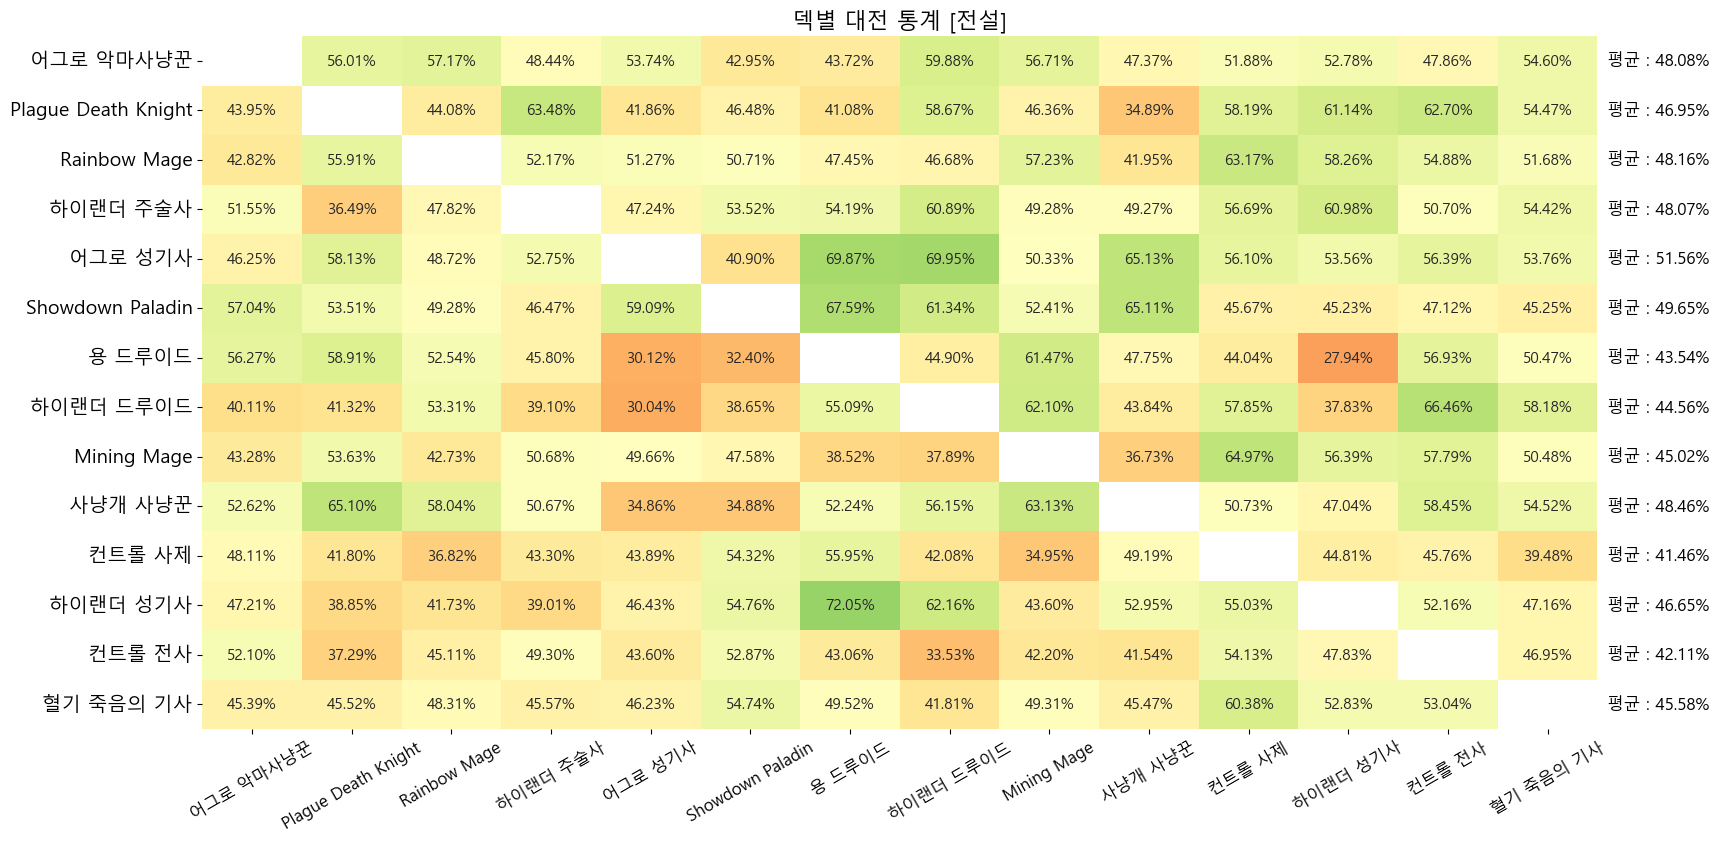

In [8]:
# 셀의 크기 조절
plt.figure(figsize=(18, 9)) 

# 히트맵 생성
heatmap = sns.heatmap(data=matchup_data, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=100, annot_kws={"size": 11}, cbar=False)

# 행별 열의 합의 평균값을 행의 오른쪽에 표시
for i, row_name in enumerate(matchup_data.index):
    row_sum = matchup_data.loc[row_name].sum()
    avg_value = row_sum / len(matchup_data.columns)
    heatmap.text(len(matchup_data.columns)+0.1, i + 0.5, f'평균 : {avg_value:.2f}', ha='left', va='center', fontsize=12, color='black')

# 각 텍스트 레이블에 퍼센트 추가
for text in heatmap.texts:
    text.set_text(f"{text.get_text()}%")

plt.title("덱별 대전 통계 [전설]", fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=14)
plt.show()
